# Exploring the Dataset
In this notebook, we will take a first look at the dataset to get a better idea of the data, how it could be analyzed and how it might need to be cleaned up.

In [24]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pycountry
import geopandas

First, we start by loading the data. The [Kaggle dataset description](https://www.kaggle.com/mhwong2007/drug-listing-dataset/) provides the following information about the columns:
* `product_title`: The title of the item.
* `product_description`: The description of the item. This field could be null as some of the listing archives are damaged.
* `ship_from`: The place where the item is shipped from. This field could be null as shipping information isn't required for certain marketplaces.
* `ship_to`: The place where the item is shipped to. This field could be null as shipping information isn't required for certain marketplaces.
* `seller`: The seller of the item.
* `price`: The price of the item, the currency is not yet unified.
* `source`: The name of the marketplace where this item is posted.

In [2]:
df = pd.read_csv("../dat/drug_listings.csv")
df

,product_title,product_description,ship_from,ship_to,seller,price,source
0,10mg Diazepam Tabletten - 10 Stück,- 10mg Diazepam Tabletten - 10 Stück\n\n- Disk...,Germany,Worldwide,1XAnOYMoUsX1BXx,$67.01,1776
1,10mg Diazepam Tabletten - 50 Stück,10 mg Diazepam / Valium / Valocordin Tabletten...,Germany,Worldwide,1XAnOYMoUsX1BXx,$93.82,1776
2,Sonderpreis !!! 10x Diazepam Tropfen 25ml,Diazepam / Valium / Valocordin Tropfen je Flas...,Germany,Worldwide,1XAnOYMoUsX1BXx,$938.32,1776
3,Sonderpreis !!! 2x Diazepam Tropfen 25ml,Diazepam / Valium / Valocordin Tropfen je Flas...,Germany,Worldwide,1XAnOYMoUsX1BXx,$214.46,1776
4,1 gr indian Ketamin,Very Strong Ketamin from India be careful\n\ni...,Austria,Worldwide,ACAB23,$50.00,1776
...,...,...,...,...,...,...,...
194428,∎∎ W. Domino XTC ∎∎ 220MG,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.86\nfor 5 Pills,themarketplace
194429,∎∎ White Domino XTC ► 220mg,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.48\nfor 5 Pills,themarketplace
194430,∎∎ White Domino XTC ► 220mg,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.82\nfor 5 Pills,themarketplace
194431,∎∎ Yellow Grenades ∎∎ 170MG,White Domino XTC Pills from the Netherlands\n\...,Europe,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 30.08\nfor 5 Pills,themarketplace


The following darknet drug marketplaces have been parsed for drug listing data:
* 1776
* Abraxas
* Agora
* Evolution
* Nucleus
* Outlaw Market
* Silk Road 2
* The Marketplace

As a first step, we can check the distribution of drug listings by marketplace. In the figure below, we can see that the [Agora marketplace](https://en.wikipedia.org/wiki/Agora_(online_marketplace)) is responsible for the majority of the listings in the dataset (around 64%, to be precise).

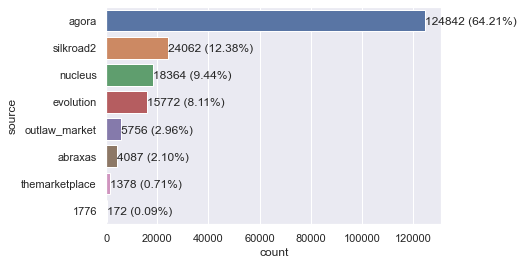

In [27]:
ax = sns.countplot(y='source', data=df, order=df["source"].value_counts().index);
total = df["source"].value_counts().sum()
for p in ax.patches:
    percentage = 100 * p.get_width() / total
    ax.annotate(f'{p.get_width()} ({percentage:.2f}%)', (p.get_width(), p.get_y()+0.55))

In [14]:
seller_counts_per_marketplace = df.groupby(["seller", "source"]).count().iloc[:, 0]
seller_counts_per_marketplace

seller                       source        
!Adderall                    nucleus            5
"Deeko"                      nucleus           28
$220for28grams               silkroad2          5
*REALDEAL*                   silkroad2          2
- OneKing -                  themarketplace    24
                                               ..
~LuxuryTransport             agora              6
~OneKing~                    nucleus           29
~sweetpuff~                  agora             20
∎∎ Sensi ▬ Marijuana & MDMA  themarketplace    41
∎∎ Sensi ▬ XTC, MDMA & THC   themarketplace    26
Name: product_title, Length: 8088, dtype: int64

In [15]:
seller_counts_per_marketplace.sort_values(ascending=False)

seller       source       
MagicBox     outlaw_market    1027
mssource     agora             851
RXChemist    agora             801
medibuds     agora             758
rc4me        agora             651
                              ... 
Deadpool     nucleus             1
cokeman      abraxas             1
lifecare     evolution           1
SubsRgood    evolution           1
boonzick420  evolution           1
Name: product_title, Length: 8088, dtype: int64

In [50]:
seller_counts_per_marketplace["blackhand"]

source
abraxas          10
agora            46
evolution         3
nucleus           6
outlaw_market    10
silkroad2        16
Name: product_title, dtype: int64

Market share by top 10 sellers on 1776 marketplace: 72.67%


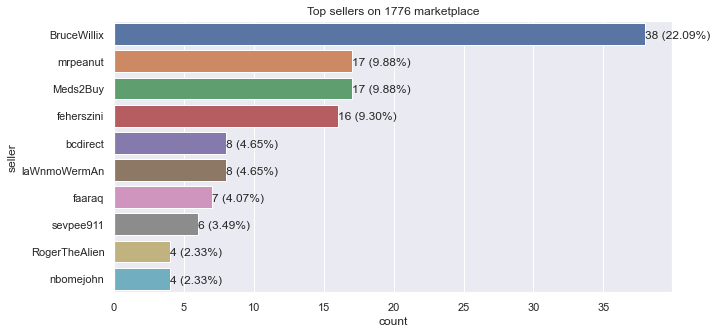

Market share by top 10 sellers on abraxas marketplace: 29.49%


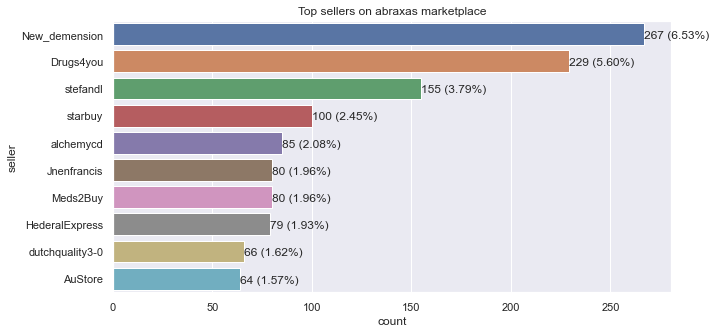

Market share by top 10 sellers on agora marketplace: 5.00%


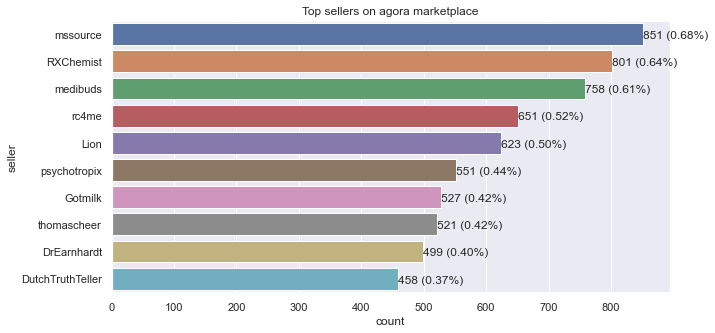

Market share by top 10 sellers on evolution marketplace: 5.80%


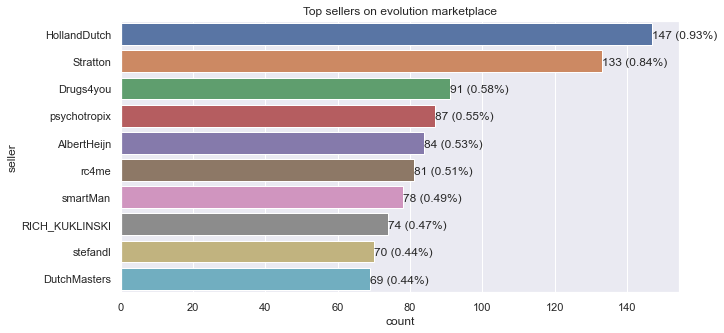

Market share by top 10 sellers on nucleus marketplace: 12.46%


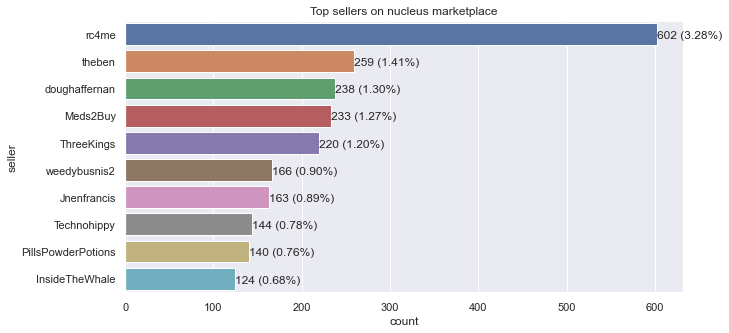

Market share by top 10 sellers on outlaw_market marketplace: 42.03%


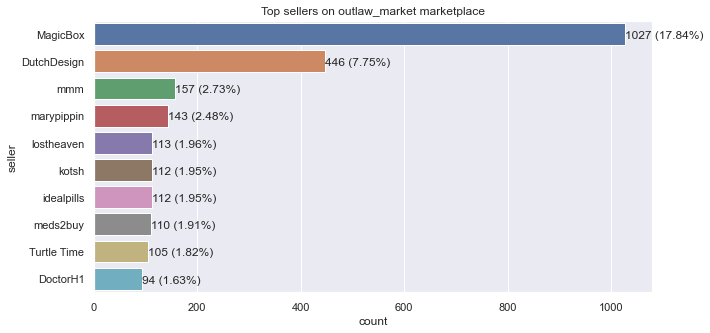

Market share by top 10 sellers on silkroad2 marketplace: 11.26%


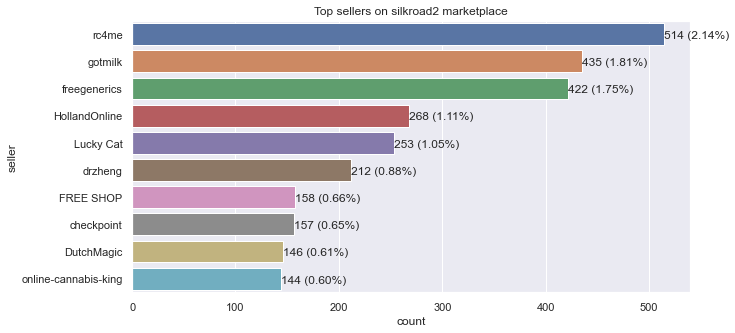

Market share by top 10 sellers on themarketplace marketplace: 26.34%


C:\Users\fredd\Anaconda3\envs\drug_data_analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8718 (\N{END OF PROOF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


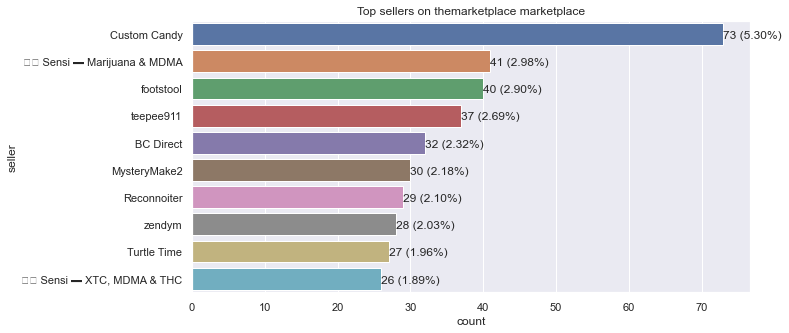

In [33]:
k = 10
for marketplace in df.source.unique():
    total_top_k_market_share = 0
    plt.figure(figsize=(10, 5))
    df_for_marketplace = df[df.source == marketplace]
    ax = sns.countplot(y='seller', data=df_for_marketplace, order=df_for_marketplace["seller"].value_counts().head(k).index);
    total = df_for_marketplace["seller"].value_counts().sum()
    for p in ax.patches:
        percentage = 100 * p.get_width() / total
        total_top_k_market_share += percentage
        ax.annotate(f'{p.get_width()} ({percentage:.2f}%)', (p.get_width(), p.get_y()+0.55))
    plt.title(f"Top sellers on {marketplace} marketplace")
    print(f"Market share by top {k} sellers on {marketplace} marketplace: {total_top_k_market_share:.2f}%")
    plt.show()

We can see that the smaller marketplaces are more likely to be dominated by a few sellers (for example, the top 10 sellers in the 1776 marketplace are responsible for over 70% of the drug listings there). Another interesting observation is that the top seller on `nucleus`, `rc4me`, is the top seller on `silkroad2` and one of the top sellers on `agora` as well. Looking at the total sales regardless of marketplace below, we can see that `rc4me` is the top seller overall:

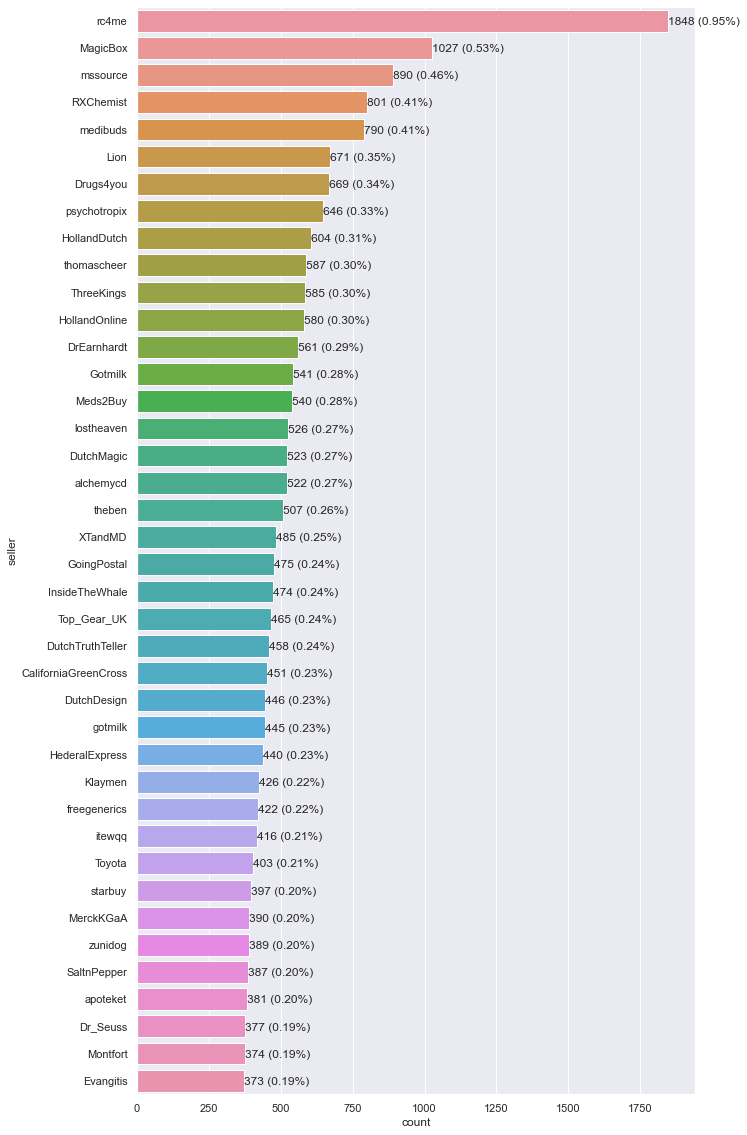

In [784]:
plt.figure(figsize=(10, 20))
ax = sns.countplot(y='seller', data=df, order=df["seller"].value_counts().head(40).index);
total = df["seller"].value_counts().sum()
for p in ax.patches:
    percentage = 100 * p.get_width() / total
    ax.annotate(f'{p.get_width()} ({percentage:.2f}%)', (p.get_width(), p.get_y()+0.55))

Let's also check whether it is common for sellers to be active on multiple marketplaces under the same name:

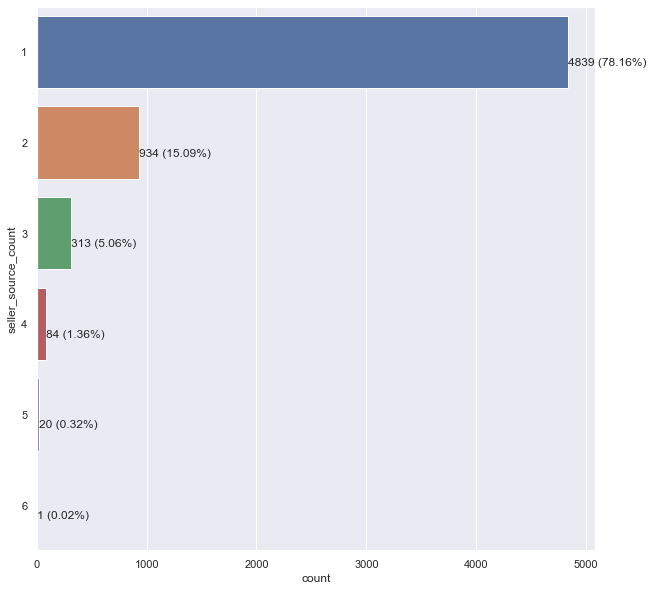

In [79]:
seller_source_value_counts = df.groupby(["seller"]).source.nunique().sort_values(ascending=False).rename("seller_source_count").to_frame()

plt.figure(figsize=(10, 10))
ax = sns.countplot(y='seller_source_count', 
                   data=seller_source_value_counts, 
                   order=seller_source_value_counts["seller_source_count"].value_counts().head(40).index);
total = seller_source_value_counts["seller_source_count"].value_counts().sum()
for p in ax.patches:
    percentage = 100 * p.get_width() / total
    ax.annotate(f'{p.get_width()} ({percentage:.2f}%)', (p.get_width(), p.get_y()+0.55))

Also, maybe there is a correlation between the amount of listings of a seller and the number of marketplaces he is active on (e.g. top sellers are usually active on multiple marketplaces)? Let's check this out with a box plot:

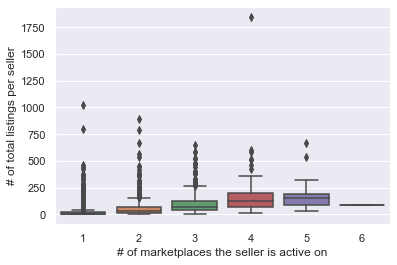

In [120]:
sns.boxplot(y=df["seller"].value_counts(), x=seller_source_value_counts["seller_source_count"]);
plt.xlabel("# of marketplaces the seller is active on")
plt.ylabel("# of total listings per seller");

As you might expect, sellers that are active on multiple marketplaces seem to have more listings overall.

Another information present in the dataset is the `ship_from` column (indicating where an item is shipped from). This information could be very interesting for later analysis, since it might allow exploration of questions such as:
* Which countries ship the most drugs?
* (How) do drug prices differ from country to country?
* Are there certain characteristics of a country that correlate with the number of drugs available there? (e.g. GDP, prevalence of mental health issues, ...)

However, when looking at the contents of these country columns (see plot below), we can see they are quite messy: Countries are referred to by different names (e.g. `DE-GERMANY` and `Germany`), by 2-letter and 3-letter country codes (e.g. `GB`, `US`, `USA`) or sometimes grouped as regions (e.g. `European Union` or `Worldwide`).

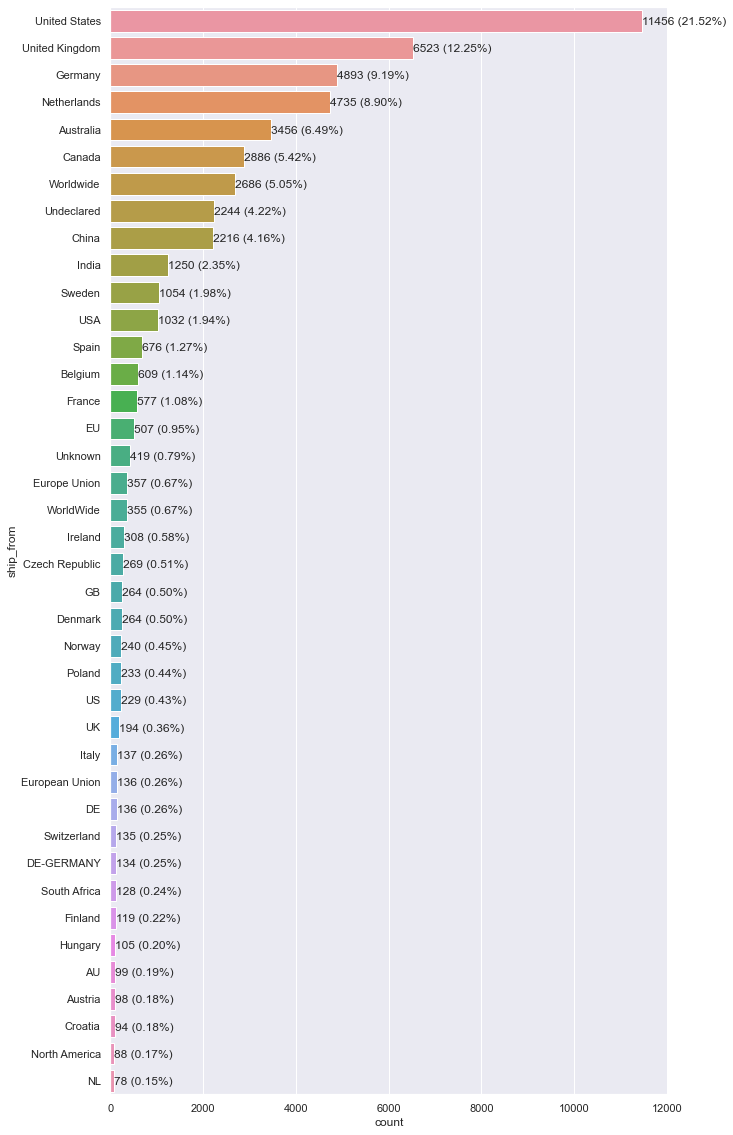

In [4]:
plt.figure(figsize=(10, 20))
ax = sns.countplot(y='ship_from', data=df, order=df["ship_from"].value_counts().head(40).index);
total = df["ship_from"].value_counts().sum()
for p in ax.patches:
    percentage = 100 * p.get_width() / total
    ax.annotate(f'{p.get_width()} ({percentage:.2f}%)', (p.get_width(), p.get_y()+0.55))

To make full use of the information in the `ship_from` column, we need to somehow standardize/group the different representations of country names into a common format. For this, we will use the [pycountry](https://pypi.org/project/pycountry/) library:

In [5]:
def find_country(search_term):
    """ Finds a country in the pycountry library using the given search term. If found, returns its 3-letter alphabetic code, else returns None. 
    
    """
    if pd.isna(search_term):
        # search_term is np.NaN or similar
        return None
    try:
        return pycountry.countries.search_fuzzy(search_term)[0].alpha_3
    except LookupError:
        return None

We will use the function above to try and find a matching country given each `ship_from` entry:

In [108]:
#df["ship_from_alpha_3"] = df["ship_from"].apply(lambda country: find_country(country))
#df

,product_title,product_description,ship_from,ship_to,seller,price,source,ship_from_alpha_3
0,10mg Diazepam Tabletten - 10 Stück,- 10mg Diazepam Tabletten - 10 Stück\n\n- Disk...,Germany,Worldwide,1XAnOYMoUsX1BXx,$67.01,1776,DEU
1,10mg Diazepam Tabletten - 50 Stück,10 mg Diazepam / Valium / Valocordin Tabletten...,Germany,Worldwide,1XAnOYMoUsX1BXx,$93.82,1776,DEU
2,Sonderpreis !!! 10x Diazepam Tropfen 25ml,Diazepam / Valium / Valocordin Tropfen je Flas...,Germany,Worldwide,1XAnOYMoUsX1BXx,$938.32,1776,DEU
3,Sonderpreis !!! 2x Diazepam Tropfen 25ml,Diazepam / Valium / Valocordin Tropfen je Flas...,Germany,Worldwide,1XAnOYMoUsX1BXx,$214.46,1776,DEU
4,1 gr indian Ketamin,Very Strong Ketamin from India be careful\n\ni...,Austria,Worldwide,ACAB23,$50.00,1776,AUT
...,...,...,...,...,...,...,...,...
194428,∎∎ W. Domino XTC ∎∎ 220MG,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.86\nfor 5 Pills,themarketplace,NLD
194429,∎∎ White Domino XTC ► 220mg,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.48\nfor 5 Pills,themarketplace,NLD
194430,∎∎ White Domino XTC ► 220mg,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.82\nfor 5 Pills,themarketplace,NLD
194431,∎∎ Yellow Grenades ∎∎ 170MG,White Domino XTC Pills from the Netherlands\n\...,Europe,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 30.08\nfor 5 Pills,themarketplace,None


In [6]:
df = pd.read_csv("../dat/drug_listings_cleaned.csv", index_col=0)
df

,product_title,product_description,ship_from,ship_to,seller,price,source,ship_from_alpha_3
0,10mg Diazepam Tabletten - 10 Stück,- 10mg Diazepam Tabletten - 10 Stück\n\n- Disk...,Germany,Worldwide,1XAnOYMoUsX1BXx,$67.01,1776,DEU
1,10mg Diazepam Tabletten - 50 Stück,10 mg Diazepam / Valium / Valocordin Tabletten...,Germany,Worldwide,1XAnOYMoUsX1BXx,$93.82,1776,DEU
2,Sonderpreis !!! 10x Diazepam Tropfen 25ml,Diazepam / Valium / Valocordin Tropfen je Flas...,Germany,Worldwide,1XAnOYMoUsX1BXx,$938.32,1776,DEU
3,Sonderpreis !!! 2x Diazepam Tropfen 25ml,Diazepam / Valium / Valocordin Tropfen je Flas...,Germany,Worldwide,1XAnOYMoUsX1BXx,$214.46,1776,DEU
4,1 gr indian Ketamin,Very Strong Ketamin from India be careful\n\ni...,Austria,Worldwide,ACAB23,$50.00,1776,AUT
...,...,...,...,...,...,...,...,...
194428,∎∎ W. Domino XTC ∎∎ 220MG,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.86\nfor 5 Pills,themarketplace,NLD
194429,∎∎ White Domino XTC ► 220mg,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.48\nfor 5 Pills,themarketplace,NLD
194430,∎∎ White Domino XTC ► 220mg,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.82\nfor 5 Pills,themarketplace,NLD
194431,∎∎ Yellow Grenades ∎∎ 170MG,White Domino XTC Pills from the Netherlands\n\...,Europe,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 30.08\nfor 5 Pills,themarketplace,NaN


We should note here that upon further inspection, we can see that a lot of the listings have no country information at all (`ship_from` as well as `ship_to`):

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194433 entries, 0 to 194432
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   product_title        194429 non-null  object
 1   product_description  180439 non-null  object
 2   ship_from            53229 non-null   object
 3   ship_to              63623 non-null   object
 4   seller               194303 non-null  object
 5   price                193947 non-null  object
 6   source               194433 non-null  object
 7   ship_from_alpha_3    45873 non-null   object
dtypes: object(8)
memory usage: 13.4+ MB


This means that we are left with a significantly smaller dataset, which also completely changes the distribution of drug marketplaces in the dataset:

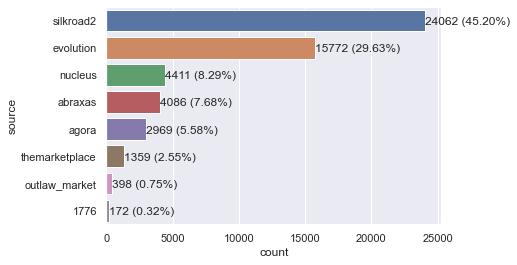

In [8]:
ship_from_info_available = df["ship_from"].notnull()
ax = sns.countplot(y='source', data=df[ship_from_info_available], order=df[ship_from_info_available]["source"].value_counts().index);
total = df[ship_from_info_available]["source"].value_counts().sum()
for p in ax.patches:
    percentage = 100 * p.get_width() / total
    ax.annotate(f'{p.get_width()} ({percentage:.2f}%)', (p.get_width(), p.get_y()+0.55))

In [29]:
df["product_title"][(df["product_title"].str.lower().str.contains("coca").fillna(False) & ~df["product_title"].str.lower().str.contains("cocain").fillna(False))]

337                           0.25 Cocaïne 89% Colombienne.
30197         20G UNTREATED COCA LEAF POWDER. £15 **NO FE**
32709                             Coca Leaves Bulk - 1 Kilo
32710                             Coca Leaves Bulk - 1 Kilo
32711                            Coca Leaves Bulk - 1 Ounce
                                ...                        
179479    50Gr. Cocaïne High quality uncut 84-89% Purene...
179480    50Gr. Cocaïne High quality uncut 84-89% Purene...
179489    5Gr. Cocaïne High quality uncut 84-89% Purenes...
179490    5Gr. Cocaïne High quality uncut 84-89% Purenes...
194133                             Coca Leaf Powder - Ypadu
Name: product_title, Length: 140, dtype: object

In [350]:
str_exp = "viagra"
(df["product_title"].str.lower().str.contains(str_exp).fillna(False) | df["product_description"].str.lower().str.contains(str_exp).fillna(False)).sum()

2097

In [185]:
df["product_description"].str.lower().str.contains("mariju|cannabis|weed|haze|kush").sum()

30981

In [318]:
(df["product_title"].str.lower().str.contains("alprazolam").fillna(False) & ~df["product_title"].str.lower().str.contains("xanax").fillna(False)).sum()

505

In [186]:
weed_only_in_description = (~df["product_title"].str.lower().str.contains("mariju|cannabis|weed|haze|kush").fillna(False) & df["product_description"].str.lower().str.contains("mariju|cannabis|weed|haze|kush").fillna(False))
weed_only_in_description.sum()

16664

In [202]:
smple = df[weed_only_in_description].sample(1)
print(smple.product_title.iloc[0])
print("")
print(smple.product_description.iloc[0])

1oz of 'PRO.G. Stankonia '

PRO.G. Kush. 1oz. vacc sealed.
Current Flavor(s): listed under 'Roll Call' (on biography)
In the making by MNG007 productions: Gen1 O.G.Kush       TBD
Herojuana x Hash Plant x NY Sour Diesel                  TBD
Once you have made up your mind on which Hollistic and 'cleanest' Ganja, part of becoming S.A.N.E is to itemize your hearts desire in detail on the 'order form'.
1. So i may allocate the "Happy pain killers" in  separate vacc bags if you decide to mix strains (ie.1.1g of *,2.4g of *)
******Frankie Says Facts******
The 1st generation of O.G. KUSH. since 1996, the world has been smoking 2nd or 3rd generations of 'O.G.Kush.' B.K.A. or 'offspring' Corleone O.G. kush, Abusive O.G., knock out O.G. Skywalker O.G, Tahoe O.G, Cotton Candy Kush etc etc...
The 1/2oz of 'O.G. Kush' is from 'The One'. NO co-op or dispensary nearest or furthest you will sample "Gen1 O.G.Kush C. indica lam." I am Privato Rezervare
Origin: SEED 
^^^^^^^^^^________________^^^^^^^^^^^

In [176]:
df.sample(5)["product_title"]

3167      DIAMOND OG KUSH / 10 GR. / COFFE SHOP BANGER! ...
114973        Genuine Britsh Dragon Stanozolol 10mg Tablets
9021         SALE!! 0.1G Pure Crystal Methamphetamine - 98%
17187     1g Supercritical co2 extracted CannaOil PURE F...
137450                   100g (3,52 Oz) WIDOW OUTDOOR CHEAP
Name: product_title, dtype: object

In [47]:
df.iloc[167421].product_description

'Quality: highest / purest\nWhite Rhino Top Quality\n\nSort: Indica, Sativa\nXbreeding: White Widow x Afghanistan\nTHC Content: middle\nCBD Content: high\nCBN Content: middle\n\nMild taste, but a heavy hitter!'

In [469]:
df[df["product_description"].str.lower().str.contains("bud").fillna(False)].product

,product_title,product_description,ship_from,ship_to,seller,price,source,ship_from_alpha_3
0,10mg Diazepam Tabletten - 10 Stück,- 10mg Diazepam Tabletten - 10 Stück\n\n- Disk...,Germany,Worldwide,1XAnOYMoUsX1BXx,$67.01,1776,DEU
1,10mg Diazepam Tabletten - 50 Stück,10 mg Diazepam / Valium / Valocordin Tabletten...,Germany,Worldwide,1XAnOYMoUsX1BXx,$93.82,1776,DEU
2,Sonderpreis !!! 10x Diazepam Tropfen 25ml,Diazepam / Valium / Valocordin Tropfen je Flas...,Germany,Worldwide,1XAnOYMoUsX1BXx,$938.32,1776,DEU
3,Sonderpreis !!! 2x Diazepam Tropfen 25ml,Diazepam / Valium / Valocordin Tropfen je Flas...,Germany,Worldwide,1XAnOYMoUsX1BXx,$214.46,1776,DEU
4,1 gr indian Ketamin,Very Strong Ketamin from India be careful\n\ni...,Austria,Worldwide,ACAB23,$50.00,1776,AUT
...,...,...,...,...,...,...,...,...
194428,∎∎ W. Domino XTC ∎∎ 220MG,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.86\nfor 5 Pills,themarketplace,NLD
194429,∎∎ White Domino XTC ► 220mg,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.48\nfor 5 Pills,themarketplace,NLD
194430,∎∎ White Domino XTC ► 220mg,White Domino XTC Pills from the Netherlands\n\...,Netherlands,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 42.82\nfor 5 Pills,themarketplace,NLD
194431,∎∎ Yellow Grenades ∎∎ 170MG,White Domino XTC Pills from the Netherlands\n\...,Europe,NaN,"∎∎ Sensi ▬ XTC, MDMA & THC",USD 30.08\nfor 5 Pills,themarketplace,NaN


In [135]:
df[df["product_title"].str.lower().str.contains("keta").fillna(False)].sample(1).product_title.values[0]

'ketama gold quailty 5 gr'

In [153]:
df[df["product_title"].str.lower().str.contains("haze").fillna(False)].sample(1).product_description.iloc[0]

'5 gram Amnesia Haze'

In [30]:
def replace_if_matches(series, term_list):
    new_series_with_grouped_terms = series.copy()
    for term in term_list:
        new_series_with_grouped_terms[series.str.lower().str.contains(term).fillna(False)] = term + "_GROUP"
    return new_series_with_grouped_terms

In [506]:
opiates = ["morphin", "buprenorphin", "methadon", "oxy", "pethidin", "fentanyl", "remifentanil", "codein", "tilidin", "tramadol"]

In [ ]:
df["product_title"].str.lower().str.contains("mariju|cannabis|weed|haze|kush").sum()

In [739]:
term_list = ["cocain|kokain|koks|coke", "mariju|cannabis|weed|haze|hash|hasch|kush|indica|sativa|thc|bud$|buds|kief|skunk|strain", "hero", "lsd", "ketamin", "mdma|molly|xtc|ecstasy", "oxy", "adderal|ritalin", "speed|meth", "codeine", "mushroom", "xanax|alprazolam", "fentanyl", "2cb|2c-b", "steroid|anabolic", "viagra", "valium|diazepam", "ghb", "mephedron", "morphin", "dmt", "nbome", "clonazepam|rivotril", "hydrocodone|acetaminophen|vicodin|norco", "tramadol", "spice", "cigarette", "zolpidem|ambien", "buprenorphine|suboxone", "modafinil"]

In [740]:
other_drug_types = ~(df["product_description"].str.lower().str.contains("|".join(term_list)).fillna(False) | df["product_title"].str.lower().str.contains("|".join(term_list)).fillna(False))

In [761]:
grouped_product_titles = replace_if_matches(df["product_title"], term_list)
grouped_product_titles

0          True
1          True
2          True
3          True
4          True
          ...  
194428     True
194429     True
194430     True
194431    False
194432     True
Name: product_title, Length: 194433, dtype: object

In [768]:
grouped_product_descs = replace_if_matches(df["product_description"], term_list)
grouped_product_descs

0         valium|diazepam_GROUP
1         valium|diazepam_GROUP
2         valium|diazepam_GROUP
3         valium|diazepam_GROUP
4                 ketamin_GROUP
                  ...          
194428                oxy_GROUP
194429                oxy_GROUP
194430                oxy_GROUP
194431                oxy_GROUP
194432                oxy_GROUP
Name: product_description, Length: 194433, dtype: object

In [772]:
grouped_product_descs_filtered = grouped_product_descs[grouped_product_descs.str.contains("_GROUP").fillna(False)]
grouped_product_descs_filtered

0         valium|diazepam_GROUP
1         valium|diazepam_GROUP
2         valium|diazepam_GROUP
3         valium|diazepam_GROUP
4                 ketamin_GROUP
                  ...          
194428                oxy_GROUP
194429                oxy_GROUP
194430                oxy_GROUP
194431                oxy_GROUP
194432                oxy_GROUP
Name: product_description, Length: 144864, dtype: object

In [780]:
drug_regexp_to_name_dict = {
    "cocain|kokain|koks|coke": "Cocaine",
    "mariju|cannabis|weed|haze|hash|hasch|kush|indica|sativa|thc|bud$|buds|kief|skunk|strain": "Cannabis", 
    "hero": "Heroine", 
    "lsd": "LSD", 
    "ketamin": "Ketamine", 
    "mdma|molly|xtc|ecstasy": "MDMA", 
    "oxy": "Oxycodon", 
    "adderal|ritalin": "Adderall", 
    "speed|meth": "Meth", 
    "codeine": "Codeine", 
    "mushroom": "Mushrooms", 
    "xanax|alprazolam": "Xanax", 
    "Fentanyl": "Fentanyl", 
    "2cb|2c-b": "2C-B", 
    "steroid|anabolic": "Steroids", 
    "viagra": "Viagra", 
    "valium|diazepam": "Valium", 
    "ghb": "GHB", 
    "mephedron": "Mephedron", 
    "morphin": "Morphine", 
    "dmt": "DMT", 
    "nbome": "NBOMe", 
    "clonazepam|rivotril": "Clonazepame", 
    "hydrocodone|acetaminophen|vicodin|norco": "Hydrocodone", 
    "tramadol": "Tramadol", 
    "spice": "Spice", 
    "cigarette": "Cigarettes", 
    "zolpidem|ambien": "Ambien", 
    "buprenorphine|suboxone": "Suboxone",
    "modafinil": "Modafinil"
}
grouped_product_descs_filtered = grouped_product_descs_filtered.replace("_GROUP", "", regex=True)
grouped_product_descs_filtered = grouped_product_descs_filtered.replace(drug_regexp_to_name_dict)

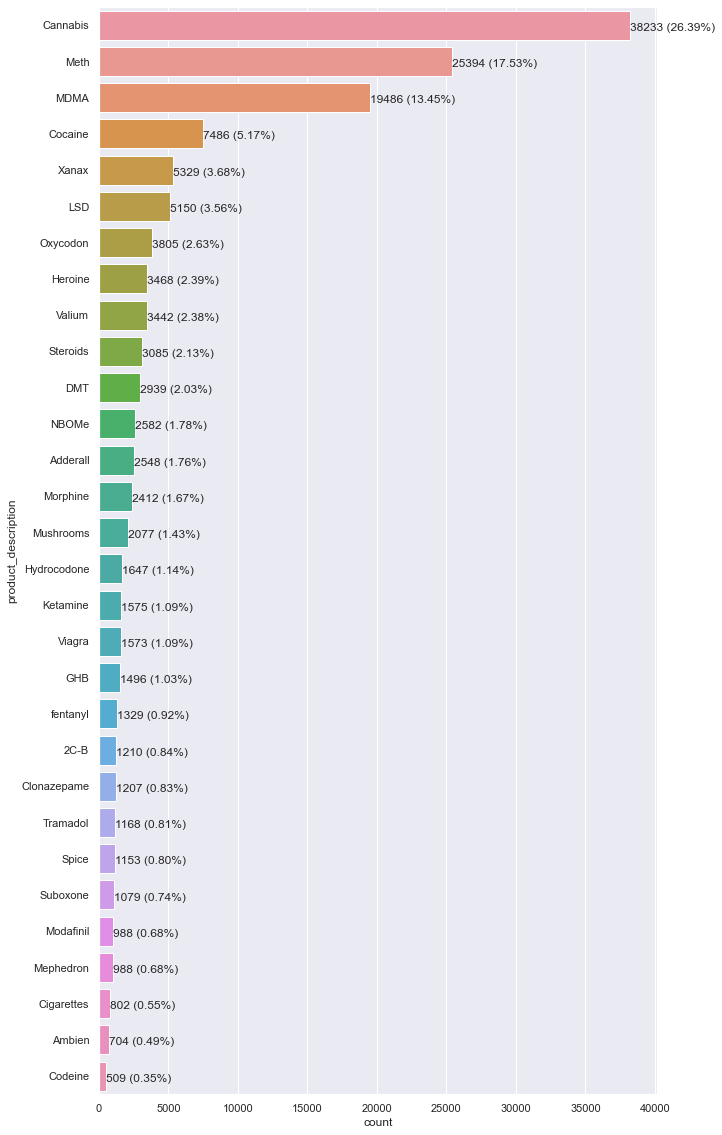

In [782]:
plt.figure(figsize=(10, 20))
ax = sns.countplot(y='product_description', data=grouped_product_descs_filtered.to_frame(), order=grouped_product_descs_filtered.value_counts().head(40).index);
total = grouped_product_descs_filtered.value_counts().sum()
for p in ax.patches:
    percentage = 100 * p.get_width() / total
    ax.annotate(f'{p.get_width()} ({percentage:.2f}%)', (p.get_width(), p.get_y()+0.55))

In [754]:
smpl = df[other_drug_types].sample(1).iloc[0]
print(smpl.product_title)
print("")
print(smpl.product_description)

Serbiska Lorazepam 2,5mg (Hemofarm) 25st

Luckys favorit är äntligen tillbaka,vi hade dessa på flugsvamp och då gick dom som smör :) 
vid oro, ångest och rastlöshet!
http://www.pharmer.org/images/foreign/lorazepam-25mg


In [742]:
(~other_drug_types).sum()

164676

In [687]:
str_exp = "custom"
filter_ = (df["product_title"].str.lower().str.contains(str_exp).fillna(False) | df["product_description"].str.lower().str.contains(str_exp).fillna(False))

In [592]:
str_exp2 = "mariju|cannabis|weed|haze|hash|kush|indica|sativa|thc"
filter_2 = (df["product_title"].str.lower().str.contains(str_exp2).fillna(False) | df["product_description"].str.lower().str.contains(str_exp2).fillna(False))

In [599]:
smpl = df[filter_ & ~filter_2].sample(1).iloc[0]
print(smpl.product_title)
print("")
print(smpl.product_description)

VAPORIZER KIT+ 1 Cart that holds oil + 1 Gram of Bud

Badass vape kit....Come with 2 carts that Vape wax (ONE SMALL ONE BIG) and 1 that vapes Oil.Silicon jar to hold wax, shatter, crumble, etc.Wax tool included.Goes great with the Wax and Oil I have listed.No escrow,US only.


150789

In [783]:
str_exp = "meth|speed"#"|".join(opiates)
(df["product_title"].str.lower().str.contains(str_exp).fillna(False) | df["product_description"].str.lower().str.contains(str_exp).fillna(False)).sum()

36767

In [64]:
#df["ship_to_alpha_3"] = df["ship_to"].apply(lambda country: find_country(country))
#df

AttributeError: 'float' object has no attribute 'strip'